# Neutral Network

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

### Read data

In [30]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

In [31]:
df.shape

(28798, 23)

### X and y arrays

In [32]:
X = df.drop(['MaxTemp'], axis=1)
y = df[['MaxTemp']]

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [33]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [35]:
def build_model(activation = 'relu', learning_rate = 0.001):
    model = Sequential()
    model.add(Dense(16,input_dim = 22, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation)) # output 

    #Compile the model 
    model.compile(
        loss = 'mae',
        optimizer  = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse'])
    return model 
    

In [36]:
model = build_model()
model.summary()


TypeError: Sequential.__init__() got an unexpected keyword argument 'random_state'

#### Training 

Using GridSearchCV to find the best hyperparameters

In [ ]:
optimizer = ['SGD','RMSprop','Adagrad']
param_grid = dict(optimizer = optimizer)


In [ ]:
kf = KFold(n_splits = 10 , shuffle= True , random_state=2023)

In [ ]:
model = KerasRegressor(model = build_model, batch_size=32, validation_split=0.3, epochs = 80)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid= param_grid, cv = kf, scoring = 'neg_mean_absolute_error', refit=True, verbose = 2, n_jobs=-1)

#### Fit the Model

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


Epoch 1/80
441/441 [==============================] - 1s 2ms/step - loss: 0.2252 - mae: 0.2252 - mse: 0.0869 - val_loss: 0.1027 - val_mae: 0.1027 - val_mse: 0.0175
Epoch 2/80
441/441 [==============================] - 1s 2ms/step - loss: 0.1043 - mae: 0.1043 - mse: 0.0183 - val_loss: 0.0838 - val_mae: 0.0838 - val_mse: 0.0114
Epoch 3/80
441/441 [==============================] - 1s 2ms/step - loss: 0.0923 - mae: 0.0923 - mse: 0.0144 - val_loss: 0.0744 - val_mae: 0.0744 - val_mse: 0.0090
Epoch 4/80
441/441 [==============================] - 1s 2ms/step - loss: 0.0868 - mae: 0.0868 - mse: 0.0132 - val_loss: 0.0778 - val_mae: 0.0778 - val_mse: 0.0098
Epoch 5/80
441/441 [==============================] - 1s 2ms/step - loss: 0.0845 - mae: 0.0845 - mse: 0.0125 - val_loss: 0.0757 - val_mae: 0.0757 - val_mse: 0.0093
Epoch 6/80
441/441 [==============================] - 1s 1ms/step - loss: 0.0816 - mae: 0.0816 - mse: 0.0119 - val_loss: 0.0679 - val_mae: 0.0679 - val_mse: 0.0075
Epoch 7/80
441/4

GridSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=80, model=<function build_model at 0x000001E1EA5DD090>, validation_split=0.3),
             n_jobs=-1, param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -0.062827 using {'optimizer': 'Adagrad'}


Inspect the best parameters

In [ ]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x000001E1EA5DD090>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.3
	shuffle=True
	run_eagerly=False
	epochs=80
)


#### Fit Model

In [ ]:
best_mlp_model.fit(X_train, y_train, epochs=80, validation_data = (X_test,y_test), verbose = 2)

Epoch 1/80


630/630 - 2s - loss: 0.1904 - mae: 0.1904 - mse: 0.0642 - val_loss: 0.0957 - val_mae: 0.0957 - val_mse: 0.0143 - 2s/epoch - 3ms/step
Epoch 2/80
630/630 - 1s - loss: 0.1027 - mae: 0.1027 - mse: 0.0176 - val_loss: 0.0843 - val_mae: 0.0843 - val_mse: 0.0111 - 849ms/epoch - 1ms/step
Epoch 3/80
630/630 - 1s - loss: 0.0947 - mae: 0.0947 - mse: 0.0154 - val_loss: 0.0732 - val_mae: 0.0732 - val_mse: 0.0087 - 861ms/epoch - 1ms/step
Epoch 4/80
630/630 - 1s - loss: 0.0916 - mae: 0.0916 - mse: 0.0147 - val_loss: 0.0720 - val_mae: 0.0720 - val_mse: 0.0082 - 858ms/epoch - 1ms/step
Epoch 5/80
630/630 - 1s - loss: 0.0896 - mae: 0.0896 - mse: 0.0141 - val_loss: 0.0653 - val_mae: 0.0653 - val_mse: 0.0069 - 882ms/epoch - 1ms/step
Epoch 6/80
630/630 - 1s - loss: 0.0865 - mae: 0.0865 - mse: 0.0133 - val_loss: 0.0644 - val_mae: 0.0644 - val_mse: 0.0068 - 876ms/epoch - 1ms/step
Epoch 7/80
630/630 - 1s - loss: 0.0840 - mae: 0.0840 - mse: 0.0126 - val_loss: 0.0612 - val_mae: 0.0612 - val_mse: 0.0061 - 856ms/ep

KerasRegressor(
	model=<function build_model at 0x000001E1EA5DD090>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.3
	shuffle=True
	run_eagerly=False
	epochs=80
)

#### Learning Curves

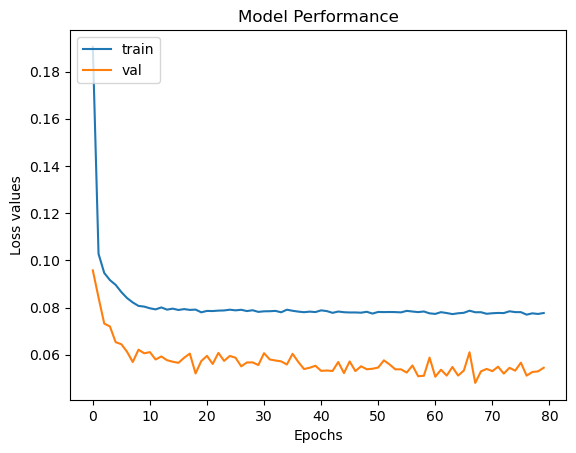

In [ ]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss values')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

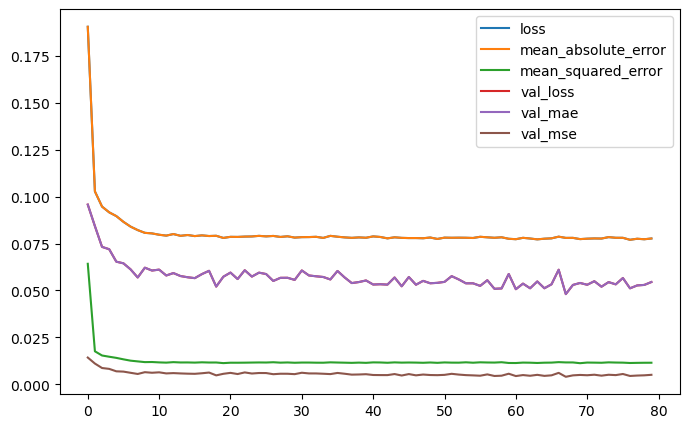

In [ ]:
pd.DataFrame(best_mlp_model.history_).plot(figsize = (8,5))
plt.show()

#### Predictions 

In [ ]:
predictions = best_mlp_model.predict(X_test)

270/270 [==============================] - 0s 962us/step


In [ ]:
predictions_unscaled = scaler_y.inverse_transform(predictions)

In [ ]:
predictions_unscaled[:10]

array([[23.252663],
       [20.011303],
       [27.100628],
       [20.126348],
       [24.97834 ],
       [22.997389],
       [15.707517],
       [23.563902],
       [23.38076 ],
       [23.271584]], dtype=float32)

In [ ]:
y_test_unscaled = scaler_y.inverse_transform(y_test)

In [ ]:
y_test_unscaled[:10]

array([[23. ],
       [19. ],
       [31.3],
       [19.2],
       [27. ],
       [22.6],
       [10.6],
       [30.4],
       [26.3],
       [23.7]])

#### Regression Report 

In [ ]:
print('R2:', metrics.r2_score(y_test_unscaled, predictions_unscaled))
print('MAE:', metrics.mean_absolute_error(y_test_unscaled, predictions_unscaled))
print('MSE:', metrics.mean_squared_error(y_test_unscaled, predictions_unscaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_unscaled, predictions_unscaled)))

R2: 0.782687701309136
MAE: 2.124975707313722
MSE: 7.705096076643908
RMSE: 2.775805482494029


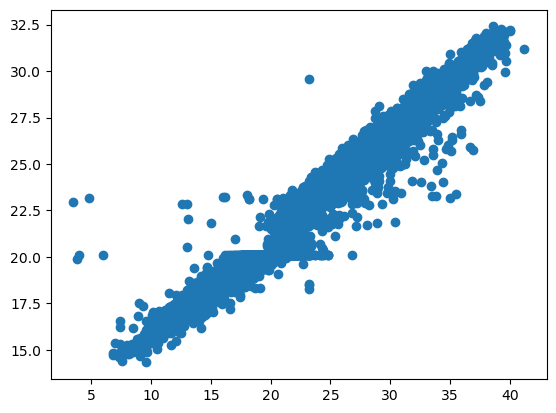

In [ ]:
plt.scatter(y_test_unscaled, predictions_unscaled)

c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: ylabel='Count'>

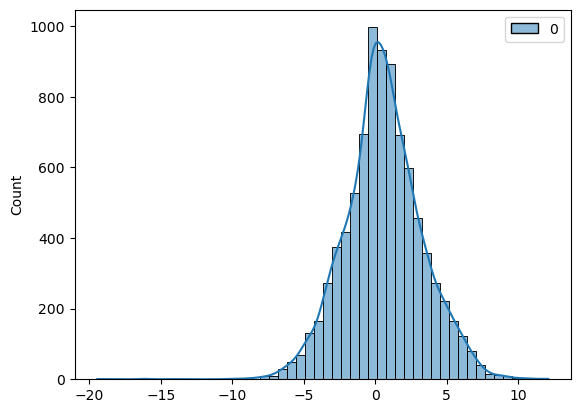

In [ ]:
sns.histplot((y_test_unscaled-predictions_unscaled), bins=50, kde=True)

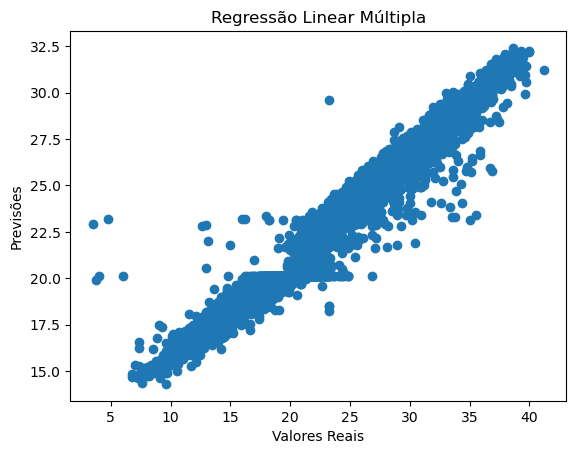

In [ ]:
plt.scatter(y_test_unscaled, predictions_unscaled)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear Múltipla')
plt.show()